In [1]:
# Import the necessary libraries.h
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
churnData = pd.read_csv("Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
def dataframe_summary(df):
    # Mostrar las primeras 5 filas
    print("Primeras 5 filas:")
    display(df.head())

    # Mostrar la forma del DataFrame
    print("Forma del DataFrame:", df.shape)

    # Obtener información sobre el DataFrame
    print("Información del DataFrame:")
    df.info()
    
dataframe_summary(churnData)

Primeras 5 filas:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


Forma del DataFrame: (7043, 16)
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-nul

In [4]:
import janitor

# Renombrar columnas en snake case
churnData = churnData.rename(columns=str.lower)
churnData = churnData.clean_names()

print(churnData)

      gender  seniorcitizen partner dependents  tenure phoneservice  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     onlinesecurity onlinebackup deviceprotection techsupport streamingtv  \
0                No          Yes               No          No         

In [5]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'], errors='coerce')

In [6]:
dataframe_summary(churnData)

Primeras 5 filas:


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


Forma del DataFrame: (7043, 16)
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7032 non-null   float64
 15  churn             7043 non-nul

In [7]:
nan_counts = churnData.isna().sum(axis=0)

print(nan_counts)

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


In [8]:
churnData['totalcharges'] = churnData['totalcharges'].fillna(churnData['totalcharges'].median())

In [9]:
nan_counts = churnData.isna().sum(axis=0)

print(nan_counts)

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [10]:
churnData_Normalizacion =  churnData[['tenure','seniorcitizen','monthlycharges','totalcharges']]
churnData_Normalizacion

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


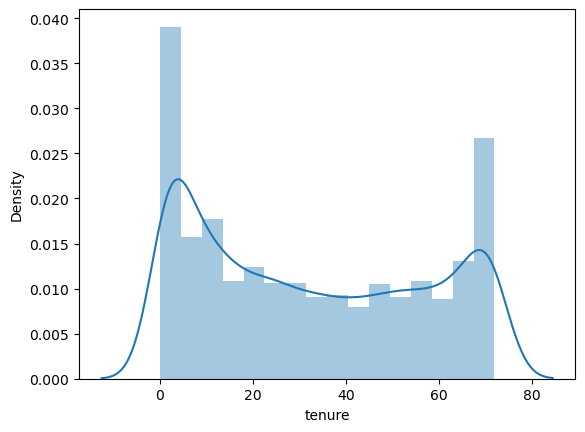

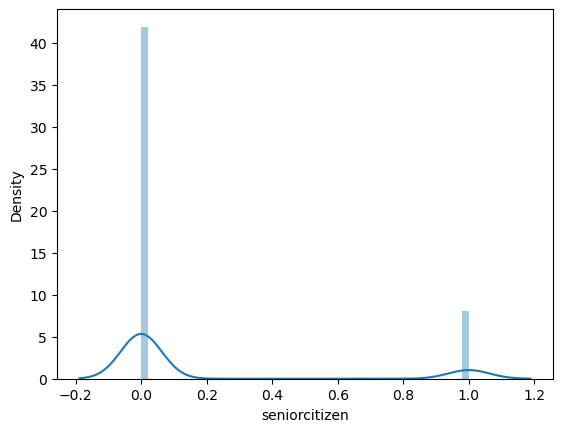

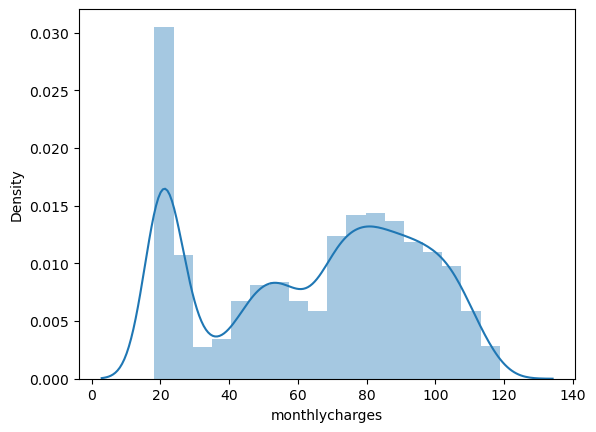

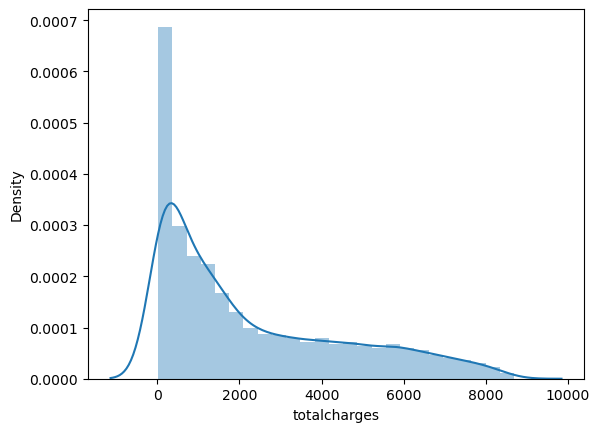

In [11]:
for i in range(len(churnData_Normalizacion.columns)):
    sns.distplot( churnData_Normalizacion.iloc[:,i])
    plt.show()

In [12]:
#transformation to uniform distribution 
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(churnData_Normalizacion)

# transform the data using the scaler
df_normalized = pd.DataFrame(scaler.transform(churnData_Normalizacion), columns=churnData_Normalizacion.columns)

print(df_normalized)

        tenure  seniorcitizen  monthlycharges  totalcharges
0    -1.694923      -5.199338       -0.726606     -1.898154
1     0.124523      -5.199338       -0.269375      0.207569
2    -1.250242      -5.199338       -0.371687     -1.177609
3     0.381675      -5.199338       -0.618078      0.188003
4    -1.250242      -5.199338        0.018820     -1.075084
...        ...            ...             ...           ...
7038 -0.127052      -5.199338        0.478025      0.236287
7039  5.199338      -5.199338        1.301191      1.855578
7040 -0.562796      -5.199338       -0.734798     -0.731881
7041 -0.981540       5.199338        0.103057     -0.786514
7042  1.079690      -5.199338        1.521525      1.607276

[7043 rows x 4 columns]


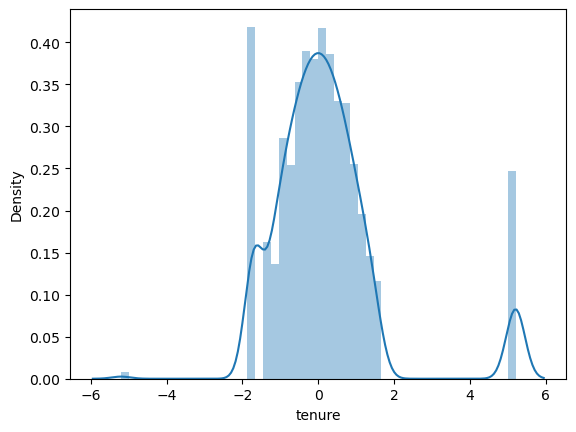

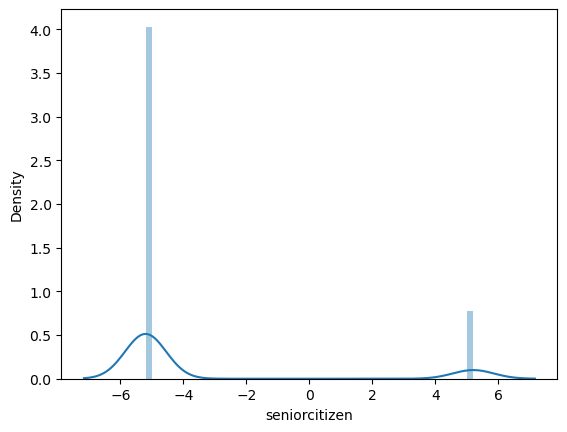

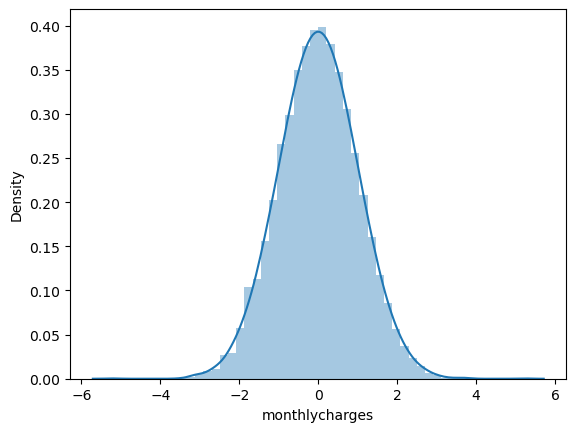

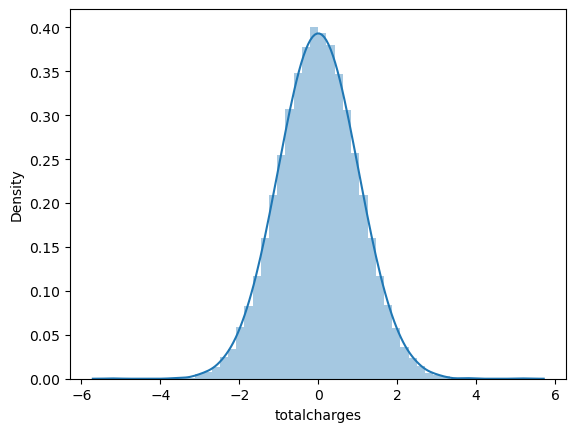

In [13]:
for i in range(len(df_normalized.columns)):
    sns.distplot( df_normalized.iloc[:,i])
    plt.show()

In [14]:
X = df_normalized[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churnData['churn'] # Outcome variable, where Churn is a binary variable indicating if a customer has churned or not.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit logistic regression on the resampled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = logreg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of logistic regression: {acc_lr}")

# Fit decision tree classifier on the resampled data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_resampled, y_train_resampled)
y_pred_dt = tree.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of decision tree classifier: {acc_dt}")

Accuracy of logistic regression: 0.7260468417317246
Accuracy of decision tree classifier: 0.7004968062455642


In [22]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Assume X and y are your feature matrix and target vector, respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply TomekLinks for downsampling
tl = TomekLinks(sampling_strategy='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

# Fit logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tl, y_train_tl)

# Compute accuracy of logistic regression model
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Fit decision tree classifier model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_tl, y_train_tl)

# Compute accuracy of decision tree classifier model
y_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)

# Compare accuracies of the two models
print("Accuracy of logistic regression model:", acc_lr)
print("Accuracy of decision tree classifier model:", acc_dtc)

Accuracy of logistic regression model: 0.7841930903928065
Accuracy of decision tree classifier model: 0.7042120208234738


In [23]:
# Apply TomekLinks one more time
tl2 = TomekLinks(sampling_strategy='majority')
X_train_tl2, y_train_tl2 = tl2.fit_resample(X_train_tl, y_train_tl)

# Compare number of samples in each class before and after TomekLinks
print("Number of samples before TomekLinks:", len(y_train))
print("Number of samples after first TomekLinks:", len(y_train_tl))
print("Number of samples after second TomekLinks:", len(y_train_tl2))

Number of samples before TomekLinks: 4930
Number of samples after first TomekLinks: 4549
Number of samples after second TomekLinks: 4412
